<div>
<h1 style="background-color:#82e0aa   ;padding:20px;border-radius:10px;border:3px solid #3339ff;color:#21618c  ;text-align:center; font-family: Babas; font-size:3.0em;" > Segmentation of e-commerce website customers |Clustering
    

<p style="text-align:center;"><img src="https://d2mvnyejvnd30x.cloudfront.net/uploads/2022/08/Ecossistema-Olist.png"   width="400" height="250"/></p></h1>
</div>

<a id="toc"></a>
# Table of Contents
- [1. Import libraries and data](#IR)
    - [1.1 Import Libraries](#imp)
    - [1.2 Data reading](#dr)
- [2. Kmeans clustering](#kmeans)
    - [2.1 RFM Clustering](#basic)
    - [2.2 RFM Clustering with customers review score](#review)
    - [2.3 Customers Clustering with a large number of features](#customer)
    - [2.3 Customers Clustering with a reduce number of features](#customer_profile)
- [3. DBSCAN Clustering](#dscan)
- [4. Agglomerative clustering](#agg)
- [5. Gaussian Mixture clustering](#gmm)


<a id="IR"></a>


# <h1 style="background-color:#82e0aa ;padding:18px;border-radius:10px;border:3px solid #3339ff;color:#21618c;text-align:center" >Import libraries and data</h1>


<a id="imp"></a>
## <span style="color:#33afff  ;"> Import libraries </span>

In [41]:

#data
import pandas as pd
import numpy as np
from datetime import date,timedelta
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Models library
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer,InterclusterDistance
from sklearn.preprocessing import StandardScaler,  RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score

#typing
from typing import List, Union, Tuple, Optional

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id="dr"></a>
## <span style="color:#33afff  ;"> Data reading </span>

In [42]:
data = pd.read_csv('customer_profile.csv', index_col="customer_unique_id")

<a href="#toc" role="button" aria-pressed="true" >⬆️  Table of Contents  ⬆️</a>

<a id="kmeans"></a>
# <h1 style="background-color:#82e0aa ;padding:18px;border-radius:10px;border:3px solid #3339ff;color:#21618c;text-align:center" >Kmeans clustering</h1>


Since we want to cluster the customers, we select the features that can distinguish the good customer and bad one. 

For this reason, we select the marketing basic features which is client recency, their frequency then their spending commonly call RFM.

We use these feature make our first kmeans clustering approach.

<a id="basic"></a>
## <span style="color:#33afff  ;">  RFM Clustering </span>

We define some functions which will help to define the optimal number of cluster or kmeans.

In [43]:
def cluster_clients(df_scale: pd.DataFrame, df: pd.DataFrame, k: Tuple[int, int] = (2, 12)) -> pd.DataFrame:
    """
    Performs k-means clustering on client data.

    Args:
        df_scale (pd.DataFrame): The rescaled DataFrame for clustering. If no rescaling is done, use the same data.
        df (pd.DataFrame): The main DataFrame containing the client data.
        k (Tuple[int, int], optional): The range of k values to consider for determining the optimal number of clusters.
            Defaults to (2, 12).

    Returns:
        pd.DataFrame: The DataFrame with an additional 'cluster' column representing the cluster labels.

    Raises:
        None.
    """

    model = KMeans(random_state=42)
    visualizer = KElbowVisualizer(model, k=k)
    visualizer.fit(df_scale)
    visualizer.show()

    n = visualizer.elbow_value_
    model_k = KMeans(n_clusters=n, random_state=42)
    kmeans = model_k.fit(df_scale)

    viz = SilhouetteVisualizer(model_k)
    viz.fit(df_scale)
    viz.poof()

    data = df.copy()
    data['cluster'] = kmeans.labels_

    return data

In [44]:
def silhouette_optimization(df: pd.DataFrame, range_n_clusters: Optional[List[int]] = None) -> None:
    """
    Performs silhouette analysis to determine the optimal number of clusters.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        range_n_clusters (List[int], optional): The range of cluster numbers to consider for silhouette analysis.
            Defaults to range(2, 10).

    Returns:
        None: Displays the silhouette scores plot.

    Raises:
        None.
    """

    if range_n_clusters is None:
        range_n_clusters = range(2, 10)

    silhouette_avg = []
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_
        silhouette_avg.append(silhouette_score(df, cluster_labels))

    plt.plot(range_n_clusters, silhouette_avg, "bx-")
    plt.xlabel("Values of K")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette analysis for optimal K")
    plt.show()

In [45]:
def elbow_optimization(df: pd.DataFrame, K: Optional[List[int]] = None) -> None:
    """
    Performs elbow method analysis to determine the optimal number of clusters.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        K (List[int], optional): The range of cluster numbers to consider for elbow analysis.
            Defaults to range(2, 16).

    Returns:
        None: Displays the sum of squared distances plot.

    Raises:
        None.
    """

    if K is None:
        K = range(2, 16)

    Sum_of_squared_distances = []
    for num_clusters in K:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df)
        Sum_of_squared_distances.append(kmeans.inertia_)

    plt.plot(K, Sum_of_squared_distances, "bx-")
    plt.xlabel("Values of K")
    plt.ylabel("Sum of squared distances/Inertia")
    plt.title("Elbow Method for Optimal K")
    plt.show()
    

In [46]:
rfm_data =  data[["recency", "frequency", "monetary"]]

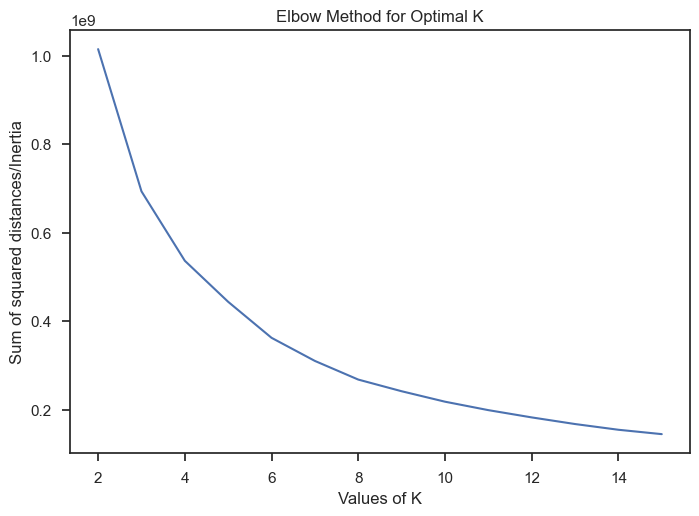

In [47]:
elbow_optimization(rfm_data)

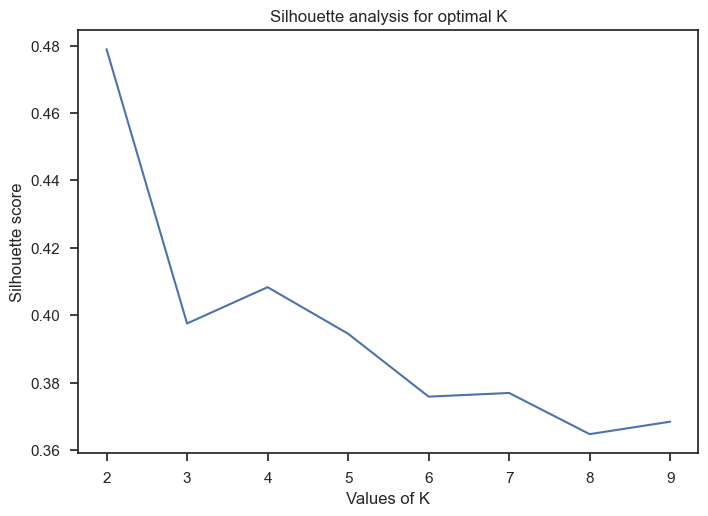

In [48]:
silhouette_optimization(rfm_data)

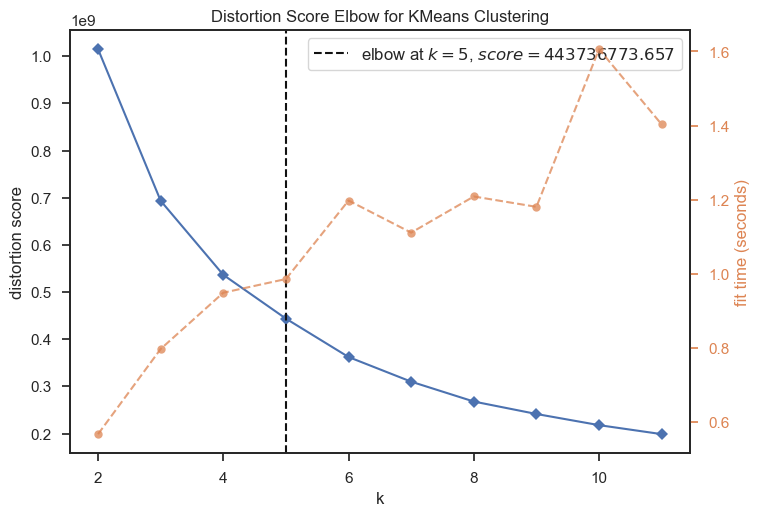

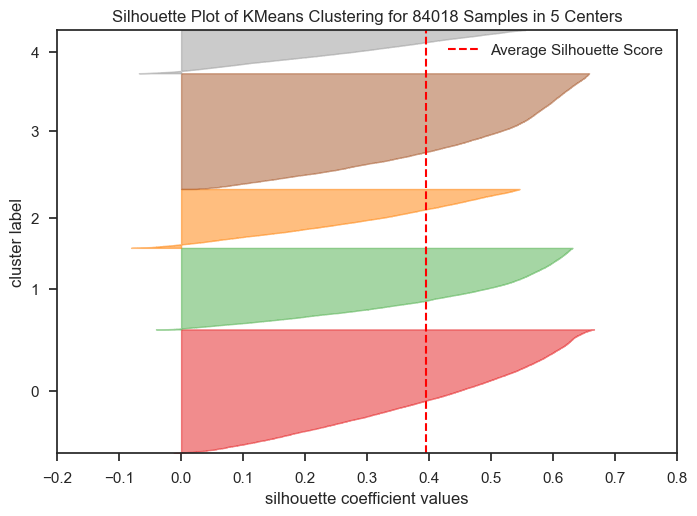

In [49]:
clustering = cluster_clients(rfm_data, rfm_data)

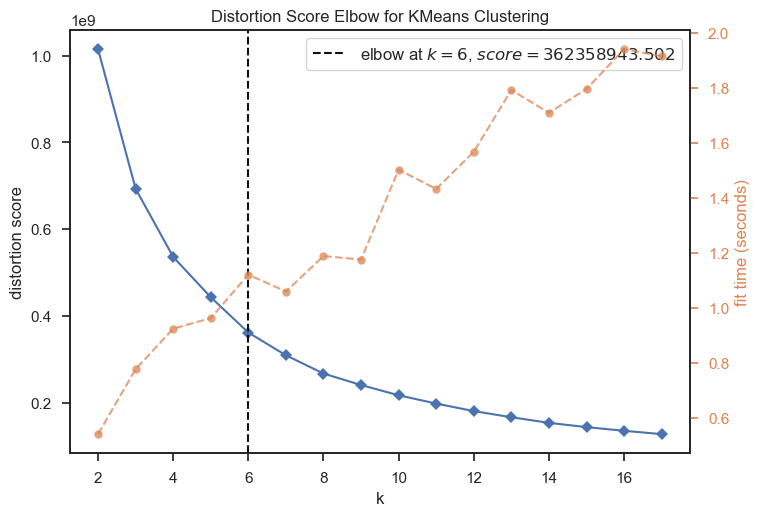

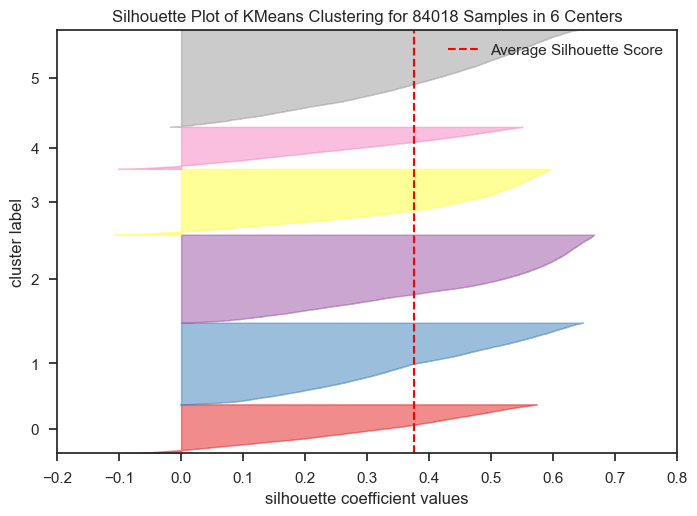

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 84018 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,18))

visualizer.fit(rfm_data)

visualizer.show()

k  =  visualizer.elbow_value_
kmean = KMeans(n_clusters=k, random_state=42)

visual = SilhouetteVisualizer(kmean)

visual.fit(rfm_data)    # Fit the data to the visualizer
visual.poof()    # Draw/show/poof the data

In [ ]:

plt.figure(figsize=(11, 9))

# Fit KMeans models for different values of k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(rfm_data)
                for k in range(1, 16)]
silhouette_scores = [silhouette_score(rfm_data, model.labels_)
                     for model in kmeans_per_k[1:]]
for k in (3, 4, 5, 6):
    plt.subplot(2,2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(rfm_data, y_pred)

    padding = len(rfm_data) // 30
    pos = padding
    ticks = []
    for i in range(k):
        # Sort silhouette coefficients for each cluster
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        # Set color based on cluster index
        color = mpl.cm.Spectral(i / k)
        
        # Fill between silhouette coefficients for the cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Add tick position for cluster labels
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        #plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    #else:
    #    plt.tick_params(labelbottom=False)
    
    # Add vertical line for average silhouette score
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show()

Six clusters seems to be better for our work.

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42) 
kmeans.fit(rfm_data) 
labels = kmeans.labels_

#scoring
calinski_score = calinski_harabasz_score(rfm_data, labels)
silhouette =  silhouette_score(rfm_data, labels)
davies_score =  davies_bouldin_score(rfm_data, labels)

scores = {"silhouette_score" : silhouette , "calinski_harabasz_score" : calinski_score, "davies-bouldin_score" :davies_score }

score = pd.DataFrame(list(scores.items()), columns=["metrics", "score"])
score

In [ ]:
rfm = rfm_data.copy()
rfm['cluster'] = kmeans.labels_
rfm.cluster.value_counts()

In [ ]:
plt.scatter(rfm.values[:, 0], rfm.values[:, 2], c=rfm['cluster'], s=20, cmap='viridis') 
#plt.legend()
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 2], c='blue', s=100, alpha=0.9) 
plt.show() 

In [ ]:
px.scatter_3d(rfm,x='recency',y='monetary',z='frequency',color='cluster', width=800, height=800)

In [ ]:
# Get the column names of the DataFrame
columns = rfm.columns

# Determine the number of variables/columns
num_vars = len(columns)

# Create a subplot grid for the scatter matrix plot
fig, axes = plt.subplots(num_vars, num_vars, figsize=(10, 10))

# Loop through each combination of variables
for i in range(num_vars):
    for j in range(num_vars):
        # Scatter plot the variables
        axes[i, j].scatter(rfm[columns[i]], rfm[columns[j]])
        # Set x-axis and y-axis labels
        axes[i, j].set_xlabel(columns[i])
        axes[i, j].set_ylabel(columns[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the scatter matrix plot
plt.show()


In [ ]:
# Define colors for each cluster
colors = sns.color_palette("Set1", rfm["cluster"].nunique()).as_hex()

# Create scatter matrix plot
fig = go.Figure(data=go.Splom(
    dimensions=[
        dict(label="Recency", values=rfm["recency"]),
        dict(label="Monetary", values=rfm["monetary"]),
        dict(label="Frequency", values=rfm["frequency"])
    ],
    marker=dict(color=rfm["cluster"], colorscale=colors)
))

# Update layout
fig.update_layout(
    width=1200,
    height=800,
    title="Scatter Matrix",
    dragmode="select"
)

# Show the plot
fig.show()

In [ ]:
# Set the color palette
colors = sns.color_palette("Set1")

# Create the scatter matrix plot
fig, axes = plt.subplots(nrows=len(rfm.columns), ncols=len(rfm.columns), figsize=(12, 12))

# Iterate through the columns for plotting
for i in range(len(rfm.columns)):
    for j in range(len(rfm.columns)):
        ax = axes[i, j]
        if i == j:
            # Plot a histogram for diagonal elements
            ax.hist(rfm.iloc[:, i], color='gray', alpha=0.5)
        else:
            # Plot a scatter plot for off-diagonal elements with color by cluster
            for cluster in range(6):
                ax.scatter(rfm.iloc[:, j][rfm['cluster'] == cluster], rfm.iloc[:, i][rfm['cluster'] == cluster],
                           color=colors[cluster], alpha=0.5)

        ax.set_xlabel(rfm.columns[j])
        ax.set_ylabel(rfm.columns[i])
        ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
fig = px.treemap(rfm, path=['cluster'],values='frequency', width=800, height=400)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
fig = px.treemap(rfm, path=['cluster'],values='monetary', width=800, height=400)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
fig = px.treemap(rfm, path=['cluster'],values='recency', width=800, height=400)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️  Table of Contents  ⬆️</a>

<a id="review"></a>
## <span style="color:#33afff  ;">  RFM Clustering with customers review score </span>

In [ ]:
rfm_datas =  data[["recency", "frequency", "monetary", "score"]]

In [ ]:
elbow_optimization(rfm_datas)

In [ ]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,18))

visualizer.fit(rfm_datas)

visualizer.show()

In [ ]:
k=visualizer.elbow_value_
model_k = KMeans(n_clusters=k, random_state=42)
kmeans = model_k.fit(rfm_datas)

viz = SilhouetteVisualizer(model_k)
viz.fit(rfm_datas)    # Fit the data to the visualizer
viz.poof()    # Draw/show/poof the data

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42) 
kmeans.fit(rfm_datas) 
labels = kmeans.labels_

#scoring
calinski_score = calinski_harabasz_score(rfm_datas, labels)
silhouette =  silhouette_score(rfm_datas, labels)
davies_score =  davies_bouldin_score(rfm_datas, labels)

scores = {"silhouette_score" : silhouette , "calinski_harabasz_score" : calinski_score, "davies-bouldin_score" :davies_score }

score = pd.DataFrame(list(scores.items()), columns=["metrics", "score"])
score

The score did not change

In [ ]:
#Plotting cluster with their centers
plt.scatter(rfm_datas.values[:, 0], rfm_datas.values[:, 2], c=labels, s=20, cmap='viridis') 
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 2], c='blue', s=100, alpha=0.9) 
plt.show() 

In [ ]:
rfms = rfm_datas.copy()
rfms['cluster'] = kmeans.labels_
rfms.cluster.value_counts()

In [ ]:
px.scatter_3d(rfms,x='score',y='recency',z='monetary',color='cluster', width=800, height=800)

In [ ]:
fig = px.scatter_matrix(rfms,
                        width=1200,
                        height=800,)
fig.update_traces(
    diagonal_visible=True,
    showupperhalf=True,
)
fig.show()

In [ ]:
fig = px.scatter_matrix(rfms, dimensions=["recency", "frequency", "monetary", "score"],
                        color="cluster",
                     
                        width=1200,
                        height=800)
fig.update_traces(
    diagonal_visible=True,
    showupperhalf=True,
)
fig.show()

In [ ]:
fig = px.treemap(rfms, path=['cluster'],values='recency', width=800, height=400)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
fig = px.treemap(rfms, path=['cluster'],values='frequency', width=800, height=400)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
fig = px.treemap(rfms, path=['cluster'],values='monetary', width=800, height=400)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
fig = px.treemap(rfms, path=['cluster'],values='score', width=800, height=400)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
rfms_describe = rfms.groupby(['cluster']).agg({
            'recency': ['mean', "min", "median",  "max"],
            'frequency': ['mean', "min", "median", "max"],
            'monetary': ['mean', "min", "median", "max"],
            'score': ['mean', "min", "max", "count"]
        }).round(2)

rfms_describe

In [ ]:
rfms_describe["cluster_spending"] = rfms_describe["monetary"]["mean"]*rfms_describe["score"]["count"]
rfms_describe

- The first cluster **cluster 0** contains the reasonably loyal customers. hey buy quite often for modest amounts.Their average maximum expenditure is less than 184 MU.

- The second cluster **cluster 1**  groups the *weakly regular customers* . They spend less than the first cluster. They buy only occasionally and for a small amount of money. This kind of customers could place a high value on the security of payment methods, or internet transaction. They must be convince.

- The third cluster, **cluster 2**, contains the very good customer. They are the most spender between the clusters. Special attention should be paid to customers in this segment in the marketing strategy.

- The fourth cluster, **cluster 3**, is the set of Non-regular customers.

- The fifth cluster, **cluster 4**, contains the good customers. Although they spend small amounts, they are very regular in placing their orders.

- The sixth cluster, **cluster 5**, is the set of fairly loyal good customers but they buy for a high amounts. It can be a customers which buy often the durable goods such as household appliances, furniture ...


<a id="customer"></a>
## <span style="color:#33afff  ;">  Customers Clustering with a large number of features </span>

In [ ]:
costumer_profile =  data[["recency", "frequency", "monetary", "score", "width",'mean_delivery_delay', 'description_lenght', 'lenght', 'width', 'weight', 'height', 'mean_distance', 'freight_ratio',  'price_ratio']]

In [ ]:
scaler = StandardScaler()
profile_std = scaler.fit_transform(costumer_profile)
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(costumer_profile)

visualizer.show()

In [ ]:
k=visualizer.elbow_value_
model_k = KMeans(n_clusters=k, random_state=42)
kmeans = model_k.fit(costumer_profile)

viz = SilhouetteVisualizer(model_k)
viz.fit(costumer_profile)    
viz.poof()   

In [ ]:
kmeans = KMeans(n_clusters=6) 
kmeans.fit(costumer_profile) 
y_kmeans = kmeans.predict(costumer_profile) 

print("Silhouette score:",silhouette_score(costumer_profile, y_kmeans))

plt.scatter(costumer_profile.values[:, 0], costumer_profile.values[:, 2], c=y_kmeans, s=20, cmap='viridis') 
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 2], c='blue', s=100, alpha=0.9) 
plt.show() 

With too much features, it's difficult to make a good clustering in the business perspective.

We need to reduce it and found some feature which will improve our model and which can work for an accepted period before monitoring and interpretable in the business perspective.

<a href="#toc" role="button" aria-pressed="true" >⬆️  Table of Contents  ⬆️</a>

<a id="customer_profile"></a>
## <span style="color:#33afff  ;">  Customers Clustering with a reduce number of features </span>

In [ ]:
customer_profile =  data[["recency", "frequency", "monetary", "score",'price', 'lenght','mean_distance' ]]

In [ ]:
kmeans = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(customer_profile)

visualizer.show()

k=visualizer.elbow_value_
model_k = KMeans(n_clusters=k, random_state=42)
model_k.fit(customer_profile)

viz = SilhouetteVisualizer(model_k)
viz.fit(customer_profile)    
viz.poof()  

In [ ]:
viz_dist =  InterclusterDistance(KMeans(6, random_state=42))
viz_dist.fit(customer_profile)
viz_dist.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42) 
kmeans.fit(customer_profile) 
labels = kmeans.labels_

#scoring
calinski_score = calinski_harabasz_score(customer_profile, labels)
silhouette =  silhouette_score(customer_profile, labels)
davies_score =  davies_bouldin_score(customer_profile, labels)

scores = {"silhouette_score" : silhouette , "calinski_harabasz_score" : calinski_score, "davies-bouldin_score" :davies_score }

score = pd.DataFrame(list(scores.items()), columns=["metrics", "score"])
score

Only Calinski-Harabasz score is improve.

In [ ]:
profile = customer_profile.copy()
profile['cluster'] = kmeans.labels_
profile.cluster.value_counts()

In [ ]:
px.scatter_3d(profile,x='price',y='mean_distance',z='monetary',color='cluster', width=800, height=800)

By adding other feature we can see that the cluster 2 customers are the customer which place their order far away to their living place.

In [ ]:
px.scatter_3d(profile,x='lenght',y='mean_distance',z='monetary',color='cluster', width=800, height=800)

In [ ]:
fig = px.scatter_matrix(profile, dimensions=["recency", "frequency", "monetary", "score",'price', 'lenght','mean_distance'],
                        color="cluster",
                        width=1200,
                        height=1200)
fig.update_traces(
    diagonal_visible=True,
    showupperhalf=True,)

fig.show()

In [ ]:
fig = px.scatter_matrix(
    profile.sample(  # sample of the data for performances reasons
        n=1000,
        random_state=42, ),
    width=1200,
    height=1200,)
fig.update_traces(
    diagonal_visible=True,
    showupperhalf=True,
)
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️  Table of Contents  ⬆️</a>

<a id="dscan"></a>
# <h1 style="background-color:#82e0aa ;padding:18px;border-radius:10px;border:3px solid #3339ff;color:#21618c;text-align:center" >DBSCAN Clustering</h1>

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(rfm_data) 

In [ ]:
df_dbscan = rfm_data.copy()
df_dbscan['DBSCAN_labels']=dbscan.labels_ 
df_dbscan['DBSCAN_labels'].value_counts()

Too much cluster and are not interpretable in the business perspectives.

Let's change the parameter and see what happen.

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(costumer_profile)

We use Scikit learn NearestNeighbors library to define the optimal espilon

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(rfm_data)
distances, indices = nbrs.kneighbors(rfm_data)

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

We get 3 as optimal epsilon value.

In [ ]:
dbscan_opt=DBSCAN(eps=3,min_samples=60)
dbscan_opt.fit(rfm_data)

In [ ]:
df_dbscan['DBSCAN_opt_labels']=dbscan_opt.labels_
df_dbscan['DBSCAN_opt_labels'].value_counts()

In [ ]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df_dbscan.values[:, 0],df_dbscan.values[:,2],c=df_dbscan['DBSCAN_opt_labels'].values,cmap="plasma",s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Not interpretable in the business point of view.

Let's test a number of parameters.

In [ ]:
fig, axes = plt.subplots(11, 6, figsize=(40, 40), subplot_kw={'xticks': (), 'yticks': ()})
# Plot clusters as red, green and blue, and outliers (-1) as white
colors = np.array(['r', 'g', 'b'])
# iterate over settings of min_samples and eps
for i, min_samples in enumerate([5, 10, 15, 20, 30, 40, 50, 60, 70, 90, 100]):
    for j, eps in enumerate([1, 1.5, 2,2.5, 3, 5]):
        # instantiate DBSCAN with a particular setting
        dbscan = DBSCAN(min_samples=min_samples, eps=eps)
        # get cluster assignments
        clusters = dbscan.fit_predict(rfm_data)
        print("min_samples: %d eps: %f  cluster: %s" % (min_samples, eps, clusters))
         # vizualize core samples and clusters.
        sizes = 60 * np.ones(rfm_data.shape[0])
        # size is given by whether something is a core sample
        sizes[dbscan.core_sample_indices_] *= 4
        axes[i, j].scatter(rfm_data.values[:, 0], rfm_data.values[:, 2], c=clusters, s=sizes, cmap='Paired')
        axes[i, j].set_title("min_samples: %d eps: %.1f" % (min_samples, eps))
fig.tight_layout()

- More the min_sample is high, the number of cluster is week. 

- With the weak min_samples, there is too much cluster which are interpretable from a business perspective.

- The DBSCAN algorithm is not relevant for our dataset.

<a href="#toc" role="button" aria-pressed="true" >⬆️  Table of Contents  ⬆️</a>

<a id="agg"></a>
# <h1 style="background-color:#82e0aa ;padding:18px;border-radius:10px;border:3px solid #3339ff;color:#21618c;text-align:center" >Agglomerative clustering</h1>

We use data sample to make the agglomerative clustive since the memory insufficient.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
rfm_sample = rfm_datas.sample(30000, random_state=42)

In [ ]:
agg = AgglomerativeClustering(linkage="complete", n_clusters=6 ).fit(rfm_sample)

In [ ]:
df_agg = rfm_sample.copy()
df_agg["labels"] = agg.labels_
df_agg["labels"].value_counts()

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(df_agg.values[:, 0], df_agg.values[:, 2], c=df_agg["labels"].values, s=20, cmap='viridis') 
#centers = kmeans.cluster_centers_ 
#plt.scatter(centers[:, 0], centers[:, 2], c='blue', s=100, alpha=0.9) 
plt.show() 

In [ ]:
px.scatter_3d(df_agg,x='recency',y='monetary',z='score',color='labels', width=800, height=800)

In [ ]:
fig = px.scatter_matrix(df_agg, dimensions=["recency", "frequency", "monetary", "score"],
                        color="labels",
                     
                        width=1200,
                        height=800)
fig.update_traces(
    diagonal_visible=True,
    showupperhalf=True,
)
fig.show()

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(rfm_sample, method='ward'))

- The agglomerative clustering gives the same results as the kmeans clustering. 

- As we can see that it take too much memory, the kmeans clustering seems better since it allows us to work on every customers.

<a href="#toc" role="button" aria-pressed="true" >⬆️  Table of Contents  ⬆️</a>

<a id="gmm"></a>
# <h1 style="background-color:#82e0aa ;padding:18px;border-radius:10px;border:3px solid #3339ff;color:#21618c;text-align:center" >Gaussian Mixture clustering</h1>

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=6, n_init=10)
gm.fit(rfm_datas)

In [ ]:
gm.weights_

In [ ]:
gm.means_

In [ ]:
gm.covariances_

In [ ]:
gm.converged_

In [ ]:
 gm.n_iter_

In [ ]:
gm.predict(rfm_datas)

In [ ]:
gm.predict_proba(rfm_datas)

In [ ]:
#predictions from gmm
df_gm = rfm_datas.copy()
labels = gm.predict(rfm_datas)
df_gm['cluster'] =  gm.predict(rfm_datas)
df_gm["cluster"].value_counts()

In [ ]:
px.scatter_3d(df_gm,x='recency',y='monetary',z='score',color='cluster', width=800, height=800)

In [ ]:
fig = px.scatter_matrix(df_gm, dimensions=["recency", "frequency", "monetary", "score"],
                        color="cluster",
                     
                        width=1200,
                        height=800)
fig.update_traces(
    diagonal_visible=True,
    showupperhalf=True,
)
fig.show()

Gaussian mixture also give some interpretable results in the business perspective.

<a href="#toc" role="button" aria-pressed="true" >⬆️  Table of Contents  ⬆️</a>

**Kmeans seems the better algorithm to train our data**